In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
import tensorflow

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [4]:
# or
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [5]:
# or
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [6]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [7]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [10]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.8519
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9288
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2079 - accuracy: 0.9409
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9483
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9537
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1460 - accuracy: 0.9580
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.9615
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9643
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9664
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9685

In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split = 0.1)

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9697 - val_loss: 0.0805 - val_accuracy: 0.9778
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 0.0814 - val_accuracy: 0.9753
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9761 - val_loss: 0.0828 - val_accuracy: 0.9747
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9775 - val_loss: 0.0817 - val_accuracy: 0.9757
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.0848 - val_accuracy: 0.9760
Epoch 

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.106
Test Accuracy: 0.968


In [14]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5440 - accuracy: 0.8488 - val_loss: 0.2356 - val_accuracy: 0.9373
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.9256 - val_loss: 0.1938 - val_accuracy: 0.9482
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9379 - val_loss: 0.1666 - val_accuracy: 0.9558
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9465 - val_loss: 0.1519 - val_accuracy: 0.9598
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9503 - val_loss: 0.1445 - val_accuracy: 0.9607
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1560 - accuracy: 0.9549 - val_loss: 0.1374 - val_accuracy: 0.9612
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9584 - val_loss: 0.1324 - val_accuracy: 0.9637
Epoch 

In [16]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Epoch 1/100
422/422 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.8568 - val_loss: 0.2435 - val_accuracy: 0.9338
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.9266 - val_loss: 0.1922 - val_accuracy: 0.9468
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2119 - accuracy: 0.9393 - val_loss: 0.1724 - val_accuracy: 0.9542
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9471 - val_loss: 0.1497 - val_accuracy: 0.9617
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9526 - val_loss: 0.1434 - val_accuracy: 0.9630
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.9570 - val_loss: 0.1335 - val_accuracy: 0.9657
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1348 - accuracy: 0.9599 - val_loss: 0.1313 - val_accuracy: 0.9650

In [17]:
pd.DataFrame(history_callback.history)

,loss,accuracy,val_loss,val_accuracy
0,0.535496,0.856796,0.243483,0.933833
1,0.258769,0.926611,0.192199,0.946833
2,0.211940,0.939333,0.172442,0.954167
3,0.183155,0.947130,0.149715,0.961667
4,0.161618,0.952648,0.143379,0.963000
...,...,...,...,...
95,0.005135,0.999018,0.236949,0.965833
96,0.003265,0.999796,0.231393,0.966833
97,0.002482,0.999889,0.234196,0.966167
98,0.002559,0.999815,0.233700,0.965000


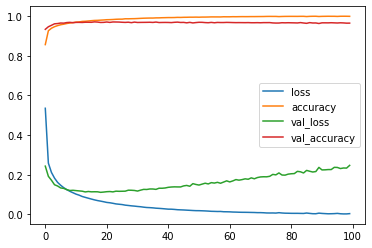

In [18]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

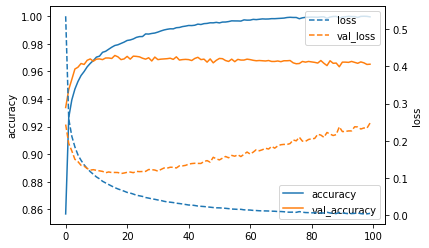

In [19]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

In [21]:
grid.fit(X_train, y_train)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.1130 - accuracy: 0.9678
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8908
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2095 - accuracy: 0.9400
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1644 - accuracy: 0.9525
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9596
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1041 - accuracy: 0.9696
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8934
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2118 - accuracy: 0.9380
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1668 - accuracy: 0.9515
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9588


1500/1500 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0449 - accuracy: 0.9866
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2489 - accuracy: 0.9288
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1036 - accuracy: 0.9694
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0685 - accuracy: 0.9790
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9934
Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0.8909
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2089 - accuracy: 0.940

1500/1500 [==============================] - 4s 3ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0203 - accuracy: 0.9940
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 0.9976
Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2431 - accuracy: 0.9303
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1016 - accuracy: 0.9705
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0645 - accuracy: 0.9809
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0334 - accurac

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B94521AA88>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [22]:
res = pd.DataFrame(grid.cv_results_)

In [23]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.547302,0.072620,0.720845,0.014320,1,32,"{'epochs': 1, 'hidden_size': 32}",0.933417,0.922917,0.924333,...,0.928533,0.005607,9,0.935229,0.930604,0.932896,0.936521,0.936458,0.934342,0.002284
1,3.775611,0.161685,0.782070,0.007652,1,64,"{'epochs': 1, 'hidden_size': 64}",0.939167,0.935167,0.940333,...,0.939000,0.002957,8,0.943250,0.947521,0.946958,0.948146,0.945562,0.946288,0.001742
2,4.652182,0.150230,0.876893,0.008083,1,256,"{'epochs': 1, 'hidden_size': 256}",0.958917,0.956917,0.957500,...,0.958150,0.002879,6,0.965771,0.966750,0.965979,0.966542,0.967750,0.966558,0.000695
3,15.462455,0.321779,0.748075,0.018519,5,32,"{'epochs': 5, 'hidden_size': 32}",0.957750,0.952583,0.954833,...,0.956133,0.002511,7,0.969562,0.969958,0.969896,0.973354,0.969875,0.970529,0.001419
4,16.114036,0.248265,0.795629,0.015405,5,64,"{'epochs': 5, 'hidden_size': 64}",0.969250,0.965000,0.964583,...,0.966117,0.002300,4,0.982250,0.983375,0.983792,0.983125,0.981062,0.982721,0.000971
5,21.693511,0.701585,0.899816,0.030828,5,256,"{'epochs': 5, 'hidden_size': 256}",0.975583,0.973333,0.970500,...,0.973067,0.002392,2,0.992375,0.989917,0.990000,0.990646,0.993417,0.991271,0.001390
6,29.798040,0.438806,0.745571,0.015288,10,32,"{'epochs': 10, 'hidden_size': 32}",0.963000,0.961833,0.962917,...,0.960633,0.003839,5,0.982229,0.982542,0.984208,0.979896,0.978542,0.981483,0.002014
7,29.819913,0.958008,0.824801,0.087694,10,64,"{'epochs': 10, 'hidden_size': 64}",0.969750,0.967667,0.970417,...,0.969650,0.001602,3,0.991958,0.990396,0.992958,0.993958,0.992063,0.992267,0.001181
8,40.456653,0.694740,0.900837,0.025076,10,256,"{'epochs': 10, 'hidden_size': 256}",0.977833,0.971667,0.977500,...,0.975217,0.002263,1,0.996146,0.993708,0.997646,0.997896,0.995250,0.996129,0.001553


In [24]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.928533          0.934342
             64                        0.939000          0.946288
             256                       0.958150          0.966558
5            32                        0.956133          0.970529
             64                        0.966117          0.982721
             256                       0.973067          0.991271
10           32                        0.960633          0.981483
             64                        0.969650          0.992267
             256                       0.975217          0.996129

In [25]:
grid.score(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9804


0.980400025844574

In [26]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 10s 23ms/step - loss: 0.2030 - accuracy: 0.9389 - val_loss: 0.0917 - val_accuracy: 0.9732
Epoch 2/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0759 - accuracy: 0.9763 - val_loss: 0.0762 - val_accuracy: 0.9777
Epoch 3/20
422/422 [==============================] - 10s 25ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0709 - val_accuracy: 0.9788
Epoch 4/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0763 - val_accuracy: 0.9772
Epoch 5/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0732 - val_accuracy: 0.9805
Epoch 6/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0853 - val_accuracy: 0.9792
Epoch 7/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0866 - val_accuracy:

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)

In [28]:
score

[0.09074479341506958, 0.9836000204086304]

In [29]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_104 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_105 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

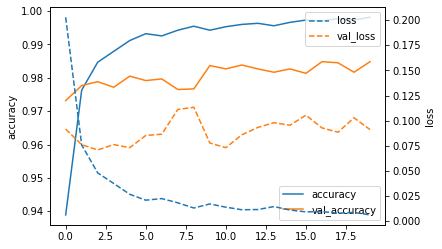

In [30]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [31]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 13s 30ms/step - loss: 0.2963 - accuracy: 0.9100 - val_loss: 0.0970 - val_accuracy: 0.9707
Epoch 2/20
422/422 [==============================] - 13s 30ms/step - loss: 0.1407 - accuracy: 0.9566 - val_loss: 0.0768 - val_accuracy: 0.9768
Epoch 3/20
422/422 [==============================] - 11s 27ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.0721 - val_accuracy: 0.9795
Epoch 4/20
422/422 [==============================] - 12s 29ms/step - loss: 0.0947 - accuracy: 0.9696 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 5/20
422/422 [==============================] - 13s 30ms/step - loss: 0.0806 - accuracy: 0.9748 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 6/20
422/422 [==============================] - 13s 30ms/step - loss: 0.0775 - accuracy: 0.9751 - val_loss: 0.0705 - val_accuracy: 0.9797
Epoch 7/20
422/422 [==============================] - 12s 28ms/step - loss: 0.0693 - accuracy: 0.9780 - val_loss: 0.0642 - val_accuracy:

In [32]:
model_dropout.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_107 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

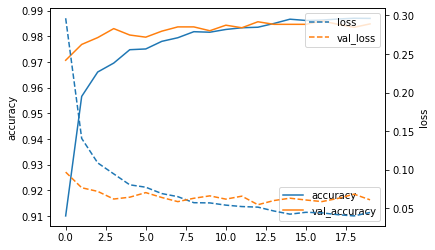

In [33]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [34]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)

In [35]:
score

[0.06119619682431221, 0.9847999811172485]

# Batch Normalization

In [36]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [37]:
model_bn.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_99 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_100 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 10)              

In [38]:
history_bn = model_bn.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1725 - accuracy: 0.9478 - val_loss: 0.0853 - val_accuracy: 0.9752
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0693 - accuracy: 0.9786 - val_loss: 0.0787 - val_accuracy: 0.9778
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0882 - val_accuracy: 0.9778
Epoch 4/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0711 - val_accuracy: 0.9813
Epoch 5/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0808 - val_accuracy: 0.9813- loss:
Epoch 6/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0758 - val_accuracy: 0.9807
Epoch 7/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0807 - val_accuracy:

Text(0, 0.5, 'loss')

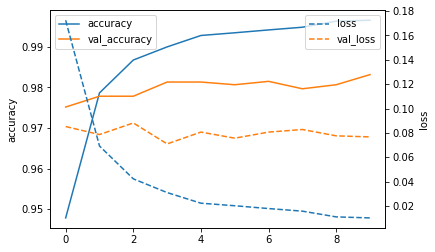

In [39]:
df = pd.DataFrame(history_bn.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")